# **CAP 4630 – Assignment 5: Neural Networks for Digit Classification**

**Name:** Adham Ali  
**ID:** 5703031  
**Date:** April 21, 2025  

---

### 🔍 **Assignment Overview**

In this assignment, I will:

1. Load and preprocess the MNIST dataset using TensorFlow.
2. Build, train, and evaluate three neural network models:
   - One with 8 hidden neurons.
   - One with 128 hidden neurons.
   - A custom model designed to achieve at least 99% F1-score.
3. Visualize model performance using:
   - Accuracy and loss graphs
   - Classification reports
   - Confusion matrices
   - Sample predictions


## 1. Load and Preprocess the MNIST Dataset
In this section, we load the MNIST dataset of handwritten digits, normalize the pixel values to a range of 0 to 1 for better model training, and reshape the 28×28 images into 1D vectors of size 784.  
We also visualize the first 10 images from the training set to confirm that the data is correctly loaded and formatted.

(60000, 28, 28)
Training data shape: (60000, 784)
Test data shape: (10000, 784)


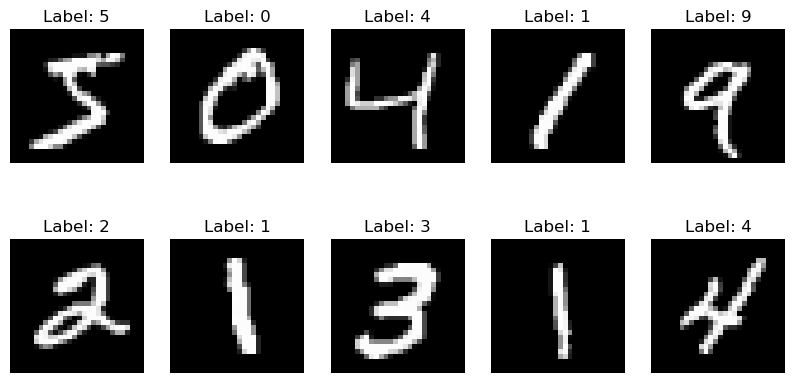

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset, which contains 60,000 training images and 10,000 test images of handwritten digits (0–9). 
# The dataset is split into training and test sets automatically using keras' built-in method.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)  # Confirm the shape of training data (should be 60,000 samples of 28x28 images)

# Convert pixel values from integers (0–255) to floating-point values between 0 and 1.
# This normalization helps the model train more efficiently by ensuring the inputs are on a similar scale.
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape each 28x28 image into a 1D vector of 784 elements (28*28 = 784).
# Neural networks expect input as flat vectors for fully connected layers, so this transformation prepares the data accordingly.
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)      

# Visualize the first 10 images in the training dataset to verify that the data looks as expected.
# Each image is reshaped back to 28x28 for proper visualization and displayed using grayscale colormap.
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)  # Create a 2-row, 5-column subplot for 10 images
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')  # Reshape the flat vector back to image
    plt.title(f"Label: {y_train[i]}")  # Show the corresponding label as the title
    plt.axis('off')  # Hide axis ticks for a cleaner view
plt.show()  # Display the figure


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


## Build the Neural Network Model
In this section, I define the architecture of the neural network using TensorFlow's Sequential API.  
The model takes 784 input features (flattened 28×28 image), passes them through a hidden layer of neurons, and outputs predictions across 10 digit classes using softmax activation.

📌 In this block, I changed the number of neurons in the hidden layer from **8 to 128** to experiment with a deeper model and analyze its impact on performance. Moreover, I custom deeper model for part 4.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Build the neural network model
# The model is defined using the Sequential API, which allows stacking layers linearly.
model = Sequential([
    # Input layer for flattened 28x28 pixel images (784 total inputs)
    Input(shape=(784,)),
    
    # Hidden layer with 8 neurons.
    # ReLU activation introduces non-linearity and helps the model learn complex patterns in the data.
    Dense(8, activation='relu'),
    
    # Output layer with 10 neurons (one for each digit class from 0 to 9).
    # Softmax activation converts the output to probability values summing to 1.
    Dense(10, activation='softmax')
])

# Display the architecture of the model including number of parameters and layer connections.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,370 (24.88 KB)

 Trainable params: 6,370 (24.88 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Neural Network
We compile and train the model using the Adam optimizer for fast convergence. ModelCheckpoint is used to save the best model based on validation accuracy.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7187 - loss: 0.9087 - val_accuracy: 0.9063 - val_loss: 0.3381
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9091 - loss: 0.3228 - val_accuracy: 0.9169 - val_loss: 0.2999
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9174 - loss: 0.2933 - val_accuracy: 0.9216 - val_loss: 0.2843
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9223 - loss: 0.2814 - val_accuracy: 0.9218 - val_loss: 0.2814
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9238 - loss: 0.2739 - val_accuracy: 0.9250 - val_loss: 0.2781
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9283 - loss: 0.2686 - val_accuracy: 0.9253 - val_loss: 0.2713
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9275 - loss: 0.2573 - val_accuracy: 0.9247 - val_loss: 0.2742
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9281 - loss: 0.2552 - 

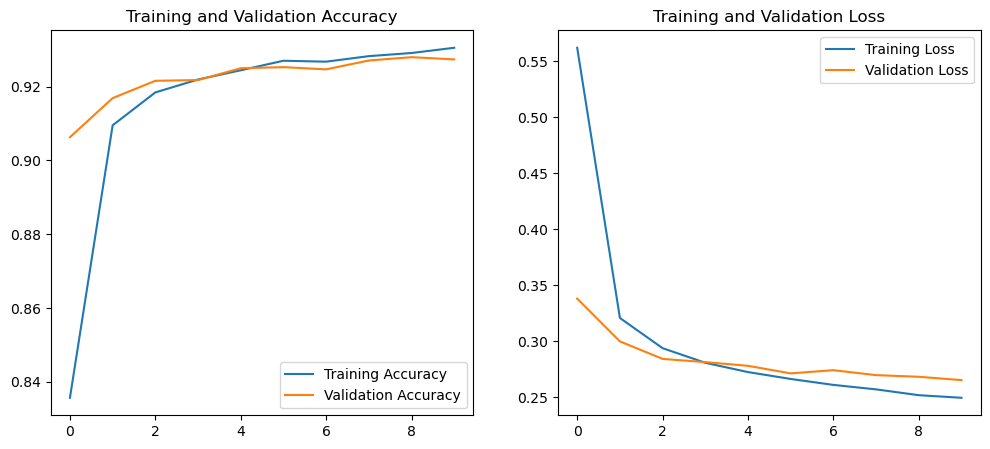

In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Compile the model by specifying:
# Optimizer: Adam, which combines the benefits of RMSProp and momentum for faster convergence.
# Loss function: 'sparse_categorical_crossentropy' is used because labels are integers (not one-hot encoded).
# Metric: We track 'accuracy' during training and evaluation to assess how well the model performs.
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a model checkpoint to automatically save the best model during training.
# 'best_model.keras' is the file where the best model will be saved.
# save_best_only=True ensures only the model with highest validation accuracy is stored.
# monitor='val_accuracy' tells it to track validation accuracy.
# mode='max' means higher accuracy is better.
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')

# Train the model using training data and evaluate on test data after each epoch.
# validation_data: used to calculate val_accuracy and val_loss after each epoch.
# epochs: number of complete passes through the training dataset.
# batch_size: number of samples used per gradient update.
# callbacks: includes the checkpoint defined above to save the best model.
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[checkpoint])

# Plot the training and validation accuracy over epochs to visualize how well the model is learning.
# This helps detect underfitting or overfitting by comparing both curves.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')       # Training accuracy curve
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Validation accuracy curve
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot the training and validation loss over epochs.
# Monitoring loss helps evaluate the model’s convergence and whether the training is stable or not.
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')         # Training loss curve
plt.plot(history.history['val_loss'], label='Validation Loss')   # Validation loss curve
plt.title('Training and Validation Loss')
plt.legend()
plt.show()  # Show the combined plots


## Evaluate the Model
We load the best saved model and evaluate it on the test data.  
Key performance metrics like accuracy, F1-score, and a confusion matrix are generated.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9189 - loss: 0.3014
Test Accuracy: 0.9280
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.89      0.92      0.90      1010
           4       0.92      0.94      0.93       982
           5       0.92      0.85      0.89       892
           6       0.96      0.94      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.90      0.89      0.89       974
           9       0.92      0.91      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



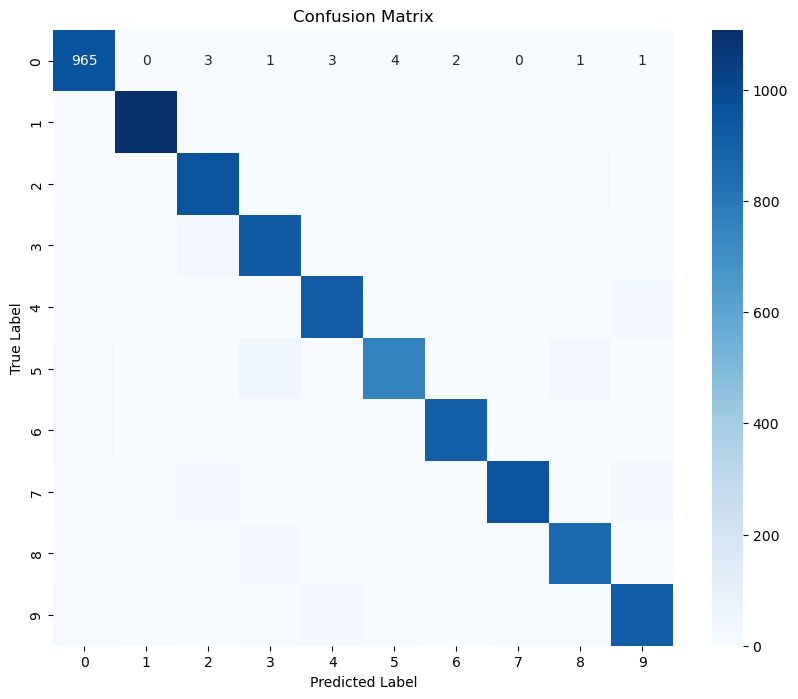

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the best model saved during training (with highest validation accuracy)
best_model = tf.keras.models.load_model('best_model.keras')

# Evaluate the loaded model on the test set to obtain final loss and accuracy.
# This gives us a quantitative measure of how well the model generalizes to unseen data.
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")  # Print test accuracy to 4 decimal places

# Predict the class probabilities for each test sample.
# Then use np.argmax to convert probabilities to class labels by choosing the index with the highest probability.
# This is necessary because the model outputs a probability distribution over 10 classes.
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))  # Print precision, recall, F1-score for each digit class

# Generate the confusion matrix to visualize the performance of the classifier.
# Each row of the matrix represents the actual class, while each column represents the predicted class.
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix using a heatmap for better interpretability.
# annot=True displays numbers in cells.
# cmap ='Blues' sets the color scheme.
# xticklabels and yticklabels label the axes from 0 to 9.
# This helps identify specific digits the model struggles to classify correctly.
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')        # Title for clarity
plt.xlabel('Predicted Label')        # X-axis shows what the model predicted
plt.ylabel('True Label')             # Y-axis shows the actual labels
plt.show()                           # Render the plot


## Visualize Predictions
We display random predictions and incorrect predictions to visually assess how well the model performs.  
This helps identify where the model succeeds or struggles with handwritten digits.

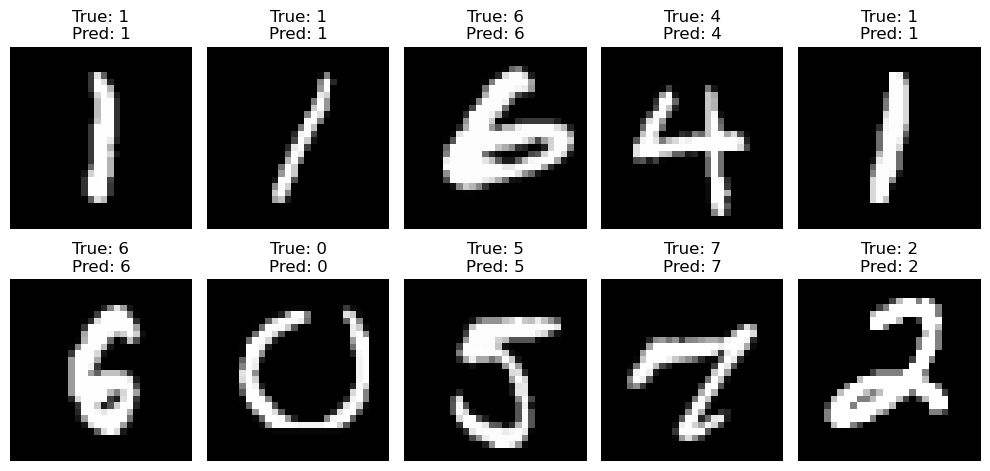

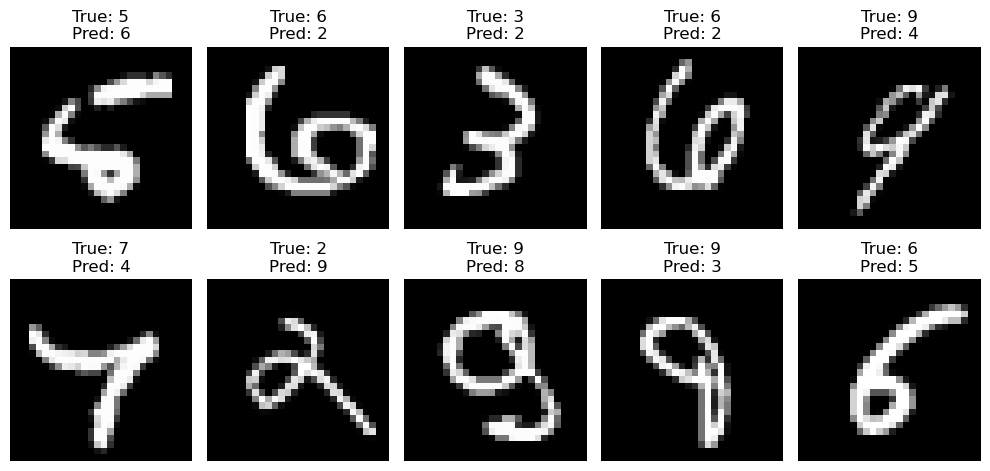

In [7]:
# Randomly select 10 indices from the test set without replacement.
# These will be used to visualize a sample of predictions made by the model.
indices = np.random.choice(len(X_test), 10, replace=False)

# Plot the 10 randomly selected test images along with their true and predicted labels.
# This gives a qualitative sense of how well the model is performing on individual samples.
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')  # Reshape 1D image back to 28x28 for display
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")  # Show true and predicted labels
    plt.axis('off')  # Remove axis ticks
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the figure

# Identify the indices of test images where the predicted labels do not match the true labels.
# This helps analyze where and why the model is making mistakes.
incorrect_indices = np.where(y_test != y_pred_classes)[0]

# Plot the first 10 incorrectly classified images along with their true and predicted labels.
# This visual feedback helps in understanding patterns in model misclassifications — e.g., 5 vs 3.
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)  # Display in a 2x5 grid
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')  # Show the misclassified image
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")  # Annotate with true/predicted values
    plt.axis('off')  # Hide axes for cleaner display
plt.tight_layout()
plt.show()  # Show the misclassified images


## Part 5 – Discussion Questions

### 1. Epochs

- **What is an epoch?**  
  An epoch is one complete pass through the entire training dataset by the neural network.

- **Why are epochs used?**  
  Epochs allow the model to gradually adjust its weights and learn from the data through repeated training cycles.

- **What happens when the number of epochs changes?**  
  Increasing epochs can improve learning but may cause overfitting. Decreasing epochs can result in underfitting if the model doesn't learn enough.

---

### 2. Batch Size

- **What is batch size and its role?**  
  Batch size is the number of samples the model processes before updating the weights. It determines how many examples are passed through the network at once during training.

- **Effects of changing batch size:**  
  A larger batch size trains faster but may generalize poorly. A smaller batch size can improve performance but increases training time and noise in updates.

---

### 3. Dropout

- **What is Dropout?**  
  Dropout is a regularization technique where some neurons are randomly turned off during training to prevent over-reliance on specific neurons.

- **How does it help?**  
  It reduces overfitting and improves generalization by forcing the model to learn more distributed and robust representations. Typical dropout rates are 0.2–0.5; rates above 0.5 often under‑fit the data.
